<a href="https://colab.research.google.com/github/I-Rosenzweig/colab/blob/main/Deep_Learning_%E2%80%93_Lab11_%E2%80%93_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


Loading data...
17464789/17464789 [==============================] - 0s 0us/step
Pad sequences (samples x time)
Training entries: 25000, labels: 25000
[1, 6, 964, 437, 7, 58, 43, 1402, 11, 6, 171, 3978, 701, 570, 997, 4179, 1880, 6, 5211, 5288, 550, 1270, 1222, 4891, 519, 6141, 5, 236, 21, 24, 222, 6, 3934, 2, 40, 109, 19, 1513, 8, 1513, 893, 8016, 5, 1493, 11, 6, 2, 5, 25, 80, 28, 14, 806, 1338, 18, 6, 20, 13, 66, 188, 6, 462, 46, 7, 4, 884, 445, 40, 2699, 2, 9671, 4, 114, 16, 1198, 200, 5400, 5, 701, 2975, 89, 111, 2, 26, 1688, 8, 97, 6, 2476, 1431, 2863, 2134, 23, 6, 519, 1522, 1527, 470, 21, 161, 36, 413, 2, 143, 2, 4756, 14, 16, 398, 18, 2, 6286, 12, 299, 40, 6, 374, 500, 13, 122, 358, 4, 2, 1530, 5128, 11, 4, 2092, 151]
Label =  0
129
1641221/1641221 [==============================] - 0s 0us/step
<START> a total waste of time just throw in a few explosions non stop fighting exotic cars a deranged millionaire slow motion computer generated car crashes and last but not least a hugh

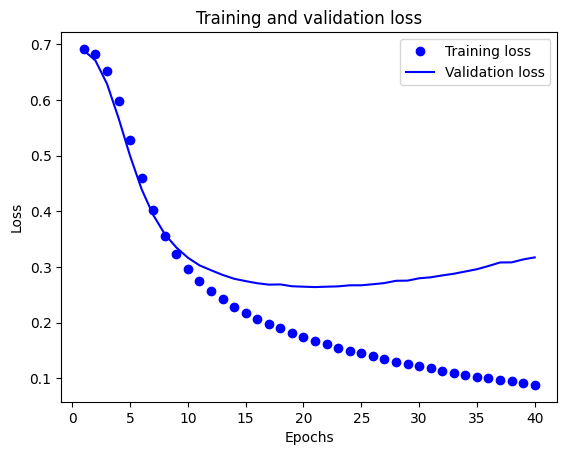

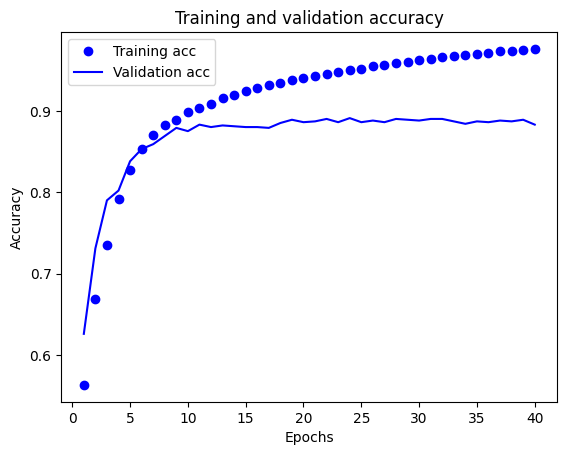

In [ ]:
#mlp 1
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import GRU
from keras.datasets import imdb
import matplotlib.pyplot as plt


import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
max_features = 10000
batch_size = 32

print('Loading data...')
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)


print('Pad sequences (samples x time)')
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

example_idx=15
print(train_data[example_idx])
print('Label = ',train_labels[example_idx])

print(len(train_data[example_idx]))
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(train_data[example_idx]))

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

print(train_data[example_idx])

vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

x_val = train_data[:1000]
partial_x_train = train_data[1000:]

y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]
print('Build model...')

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(test_data, test_labels)

print(results)
history_dict = history.history
history_dict.keys()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()   # clear figure
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Loading data...
Pad sequences (samples x time)
Training entries: 25000, labels: 25000
[1, 6, 964, 437, 7, 58, 43, 1402, 11, 6, 171, 3978, 701, 570, 997, 4179, 1880, 6, 5211, 5288, 550, 1270, 1222, 4891, 519, 6141, 5, 236, 21, 24, 222, 6, 3934, 2, 40, 109, 19, 1513, 8, 1513, 893, 8016, 5, 1493, 11, 6, 2, 5, 25, 80, 28, 14, 806, 1338, 18, 6, 20, 13, 66, 188, 6, 462, 46, 7, 4, 884, 445, 40, 2699, 2, 9671, 4, 114, 16, 1198, 200, 5400, 5, 701, 2975, 89, 111, 2, 26, 1688, 8, 97, 6, 2476, 1431, 2863, 2134, 23, 6, 519, 1522, 1527, 470, 21, 161, 36, 413, 2, 143, 2, 4756, 14, 16, 398, 18, 2, 6286, 12, 299, 40, 6, 374, 500, 13, 122, 358, 4, 2, 1530, 5128, 11, 4, 2092, 151]
Label =  0
129
<START> a total waste of time just throw in a few explosions non stop fighting exotic cars a deranged millionaire slow motion computer generated car crashes and last but not least a hugh <UNK> like character with wall to wall hot babes and mix in a <UNK> and you will have this sorry excuse for a movie i really go

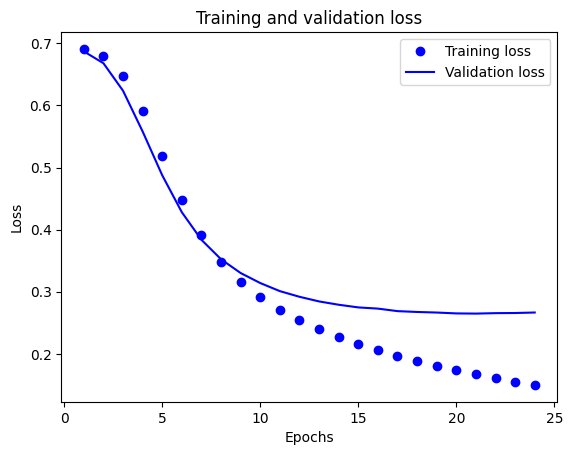

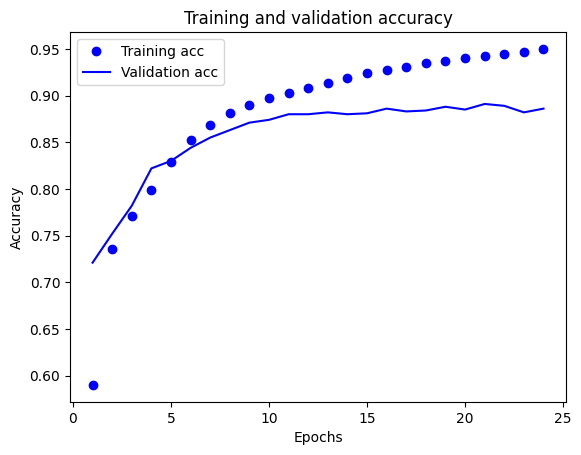

In [ ]:
#mlp 2 with callback
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import GRU
from keras.datasets import imdb
import matplotlib.pyplot as plt


import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
max_features = 10000
batch_size = 32

print('Loading data...')
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)


print('Pad sequences (samples x time)')
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

example_idx=15
print(train_data[example_idx])
print('Label = ',train_labels[example_idx])

print(len(train_data[example_idx]))
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(train_data[example_idx]))

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

print(train_data[example_idx])

vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

x_val = train_data[:1000]
partial_x_train = train_data[1000:]

y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]
print('Build model...')

history = model.fit(partial_x_train,
                    partial_y_train,
                    callbacks=[callback],
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(test_data, test_labels)

print(results)
history_dict = history.history
history_dict.keys()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()   # clear figure
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#cnn
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution1D, Flatten, Dropout
from keras.layers import Embedding
from keras.utils import pad_sequences


# Using keras to load the dataset with the top_words
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Pad the sequences to the same length
max_review_length = 256
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

# Using embedding from Keras
embedding_vecor_length = 300
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

# Convolutional model (3x conv, flatten, 2x dense)
model.add(Convolution1D(64, 3, padding='same'))
model.add(Convolution1D(32, 3, padding='same'))
model.add(Convolution1D(16, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(180,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, epochs=10, batch_size=64)

# Evaluation on the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 256, 300)          3000000   
                                                                 
 conv1d (Conv1D)             (None, 256, 64)           57664     
                                                                 
 conv1d_1 (Conv1D)           (None, 256, 32)           6176      
                                                                 
 conv1d_2 (Conv1D)           (None, 256, 16)           1552      
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_4 (Dense)             (None, 180)              

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 256, 300)          3000000   
                                                                 
 conv1d_1 (Conv1D)           (None, 256, 64)           57664     
                                                                 
 conv1d_2 (Conv1D)           (None, 256, 32)           6176      
                                                                 
 conv1d_3 (Conv1D)           (None, 256, 16)           1552      
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dropout_2 (Dropout)         (None, 4096)              0         
                                                                 
 dense_14 (Dense)            (None, 180)              

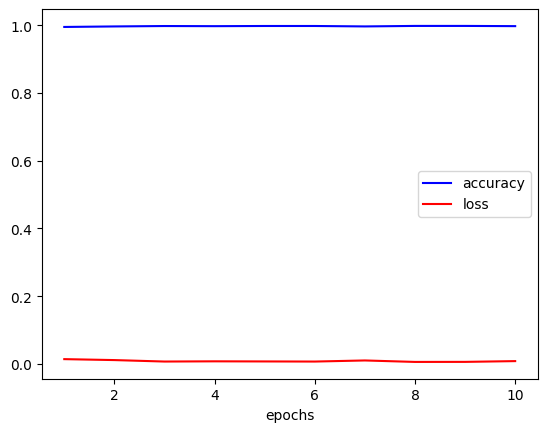

In [ ]:
#cnn with callback
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution1D, Flatten, Dropout
from keras.layers import Embedding
from keras.utils import pad_sequences
import matplotlib.pyplot as plt

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

# Using keras to load the dataset with the top_words
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Pad the sequences to the same length
max_review_length = 256
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

# Using embedding from Keras
embedding_vecor_length = 300
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

# Convolutional model (3x conv, flatten, 2x dense)
model.add(Convolution1D(64, 3, padding='same'))
model.add(Convolution1D(32, 3, padding='same'))
model.add(Convolution1D(16, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(180,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

history2=model.fit(X_train, y_train, epochs=10, batch_size=64,callbacks=[callback])

# Evaluation on the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

history2=model.fit(X_train, y_train, epochs=10, batch_size=64,callbacks=[callback])

# Evaluation on the test set

print("Accuracy: %.2f%%" % (scores[1]*100))
history2_dict = history2.history
history2_dict.keys()
acc = history2_dict['accuracy']
loss = history2_dict['loss']
epoch=range(1,11,1)

plt.plot(epoch,acc,'-b',label='accuracy')
plt.plot(epoch,loss,'-r',label='loss')
plt.xlabel("epochs")
plt.legend()
plt.show()

17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 500)          500000    
                                                                 
 conv1d (Conv1D)             (None, 256, 64)           96064     
                                                                 
 conv1d_1 (Conv1D)           (None, 256, 32)           6176      
                                                                 
 conv1d_2 (Conv1D)           (None, 256, 16)           1552      
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                         

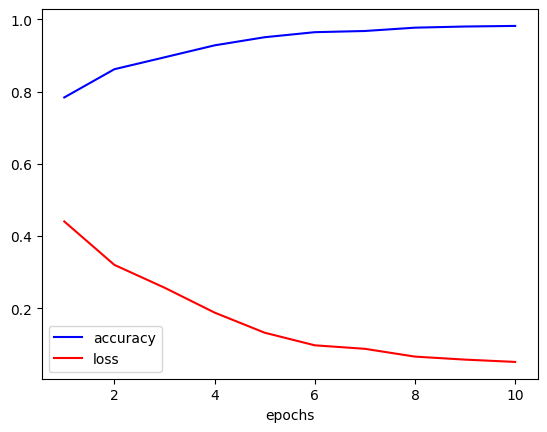

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 500)          1000000   
                                                                 
 conv1d_3 (Conv1D)           (None, 256, 64)           96064     
                                                                 
 conv1d_4 (Conv1D)           (None, 256, 32)           6176      
                                                                 
 conv1d_5 (Conv1D)           (None, 256, 16)           1552      
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dropout_2 (Dropout)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 180)              

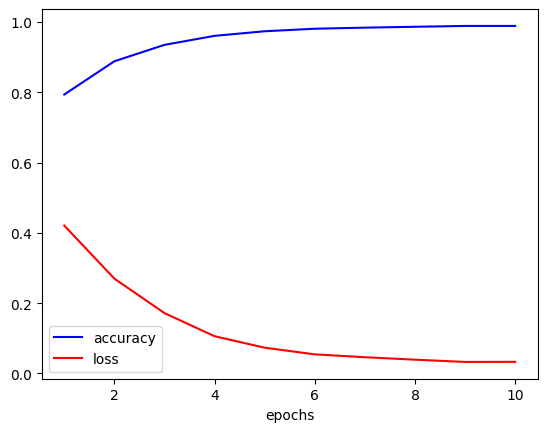

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 256, 500)          1500000   
                                                                 
 conv1d_6 (Conv1D)           (None, 256, 64)           96064     
                                                                 
 conv1d_7 (Conv1D)           (None, 256, 32)           6176      
                                                                 
 conv1d_8 (Conv1D)           (None, 256, 16)           1552      
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dropout_4 (Dropout)         (None, 4096)              0         
                                                                 
 dense_4 (Dense)             (None, 180)              

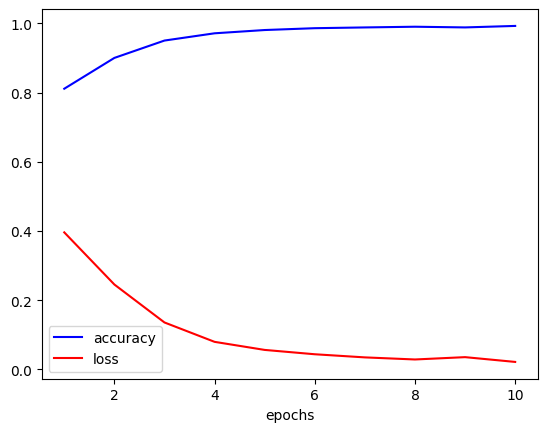

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 256, 500)          2000000   
                                                                 
 conv1d_9 (Conv1D)           (None, 256, 64)           96064     
                                                                 
 conv1d_10 (Conv1D)          (None, 256, 32)           6176      
                                                                 
 conv1d_11 (Conv1D)          (None, 256, 16)           1552      
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 dropout_6 (Dropout)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 180)              

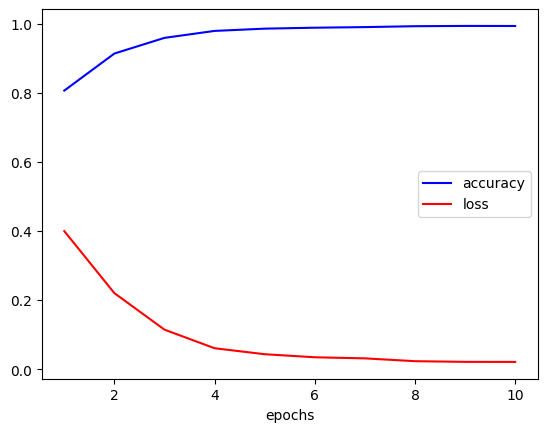

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 256, 500)          2500000   
                                                                 
 conv1d_12 (Conv1D)          (None, 256, 64)           96064     
                                                                 
 conv1d_13 (Conv1D)          (None, 256, 32)           6176      
                                                                 
 conv1d_14 (Conv1D)          (None, 256, 16)           1552      
                                                                 
 flatten_4 (Flatten)         (None, 4096)              0         
                                                                 
 dropout_8 (Dropout)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 180)              

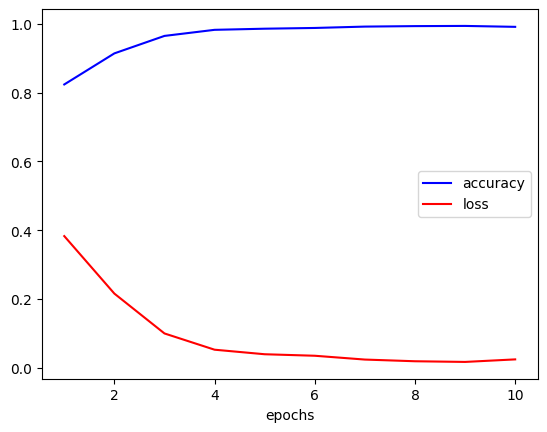

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 256, 500)          3000000   
                                                                 
 conv1d_15 (Conv1D)          (None, 256, 64)           96064     
                                                                 
 conv1d_16 (Conv1D)          (None, 256, 32)           6176      
                                                                 
 conv1d_17 (Conv1D)          (None, 256, 16)           1552      
                                                                 
 flatten_5 (Flatten)         (None, 4096)              0         
                                                                 
 dropout_10 (Dropout)        (None, 4096)              0         
                                                                 
 dense_10 (Dense)            (None, 180)              

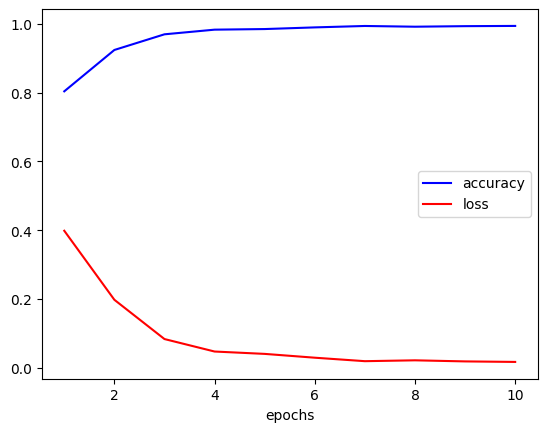

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 256, 500)          3500000   
                                                                 
 conv1d_18 (Conv1D)          (None, 256, 64)           96064     
                                                                 
 conv1d_19 (Conv1D)          (None, 256, 32)           6176      
                                                                 
 conv1d_20 (Conv1D)          (None, 256, 16)           1552      
                                                                 
 flatten_6 (Flatten)         (None, 4096)              0         
                                                                 
 dropout_12 (Dropout)        (None, 4096)              0         
                                                                 
 dense_12 (Dense)            (None, 180)              

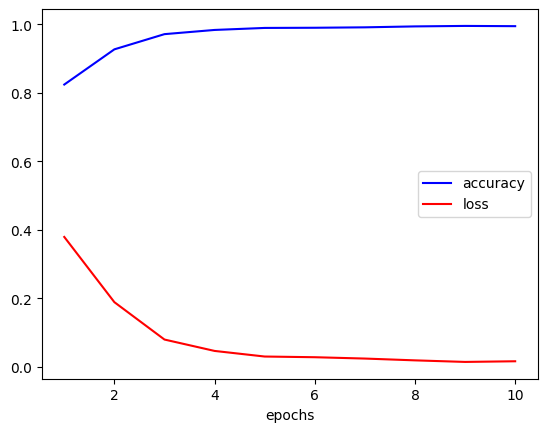

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 256, 500)          4000000   
                                                                 
 conv1d_21 (Conv1D)          (None, 256, 64)           96064     
                                                                 
 conv1d_22 (Conv1D)          (None, 256, 32)           6176      
                                                                 
 conv1d_23 (Conv1D)          (None, 256, 16)           1552      
                                                                 
 flatten_7 (Flatten)         (None, 4096)              0         
                                                                 
 dropout_14 (Dropout)        (None, 4096)              0         
                                                                 
 dense_14 (Dense)            (None, 180)              

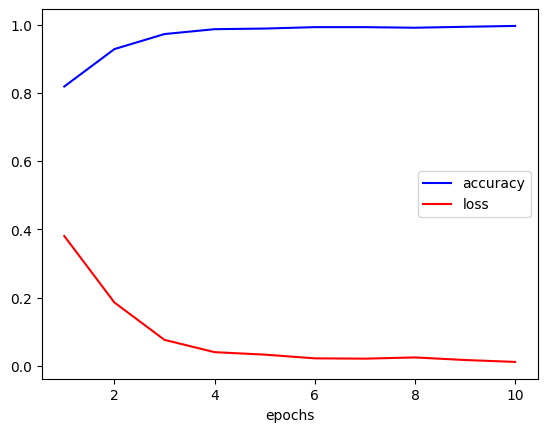

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 256, 500)          4500000   
                                                                 
 conv1d_24 (Conv1D)          (None, 256, 64)           96064     
                                                                 
 conv1d_25 (Conv1D)          (None, 256, 32)           6176      
                                                                 
 conv1d_26 (Conv1D)          (None, 256, 16)           1552      
                                                                 
 flatten_8 (Flatten)         (None, 4096)              0         
                                                                 
 dropout_16 (Dropout)        (None, 4096)              0         
                                                                 
 dense_16 (Dense)            (None, 180)              

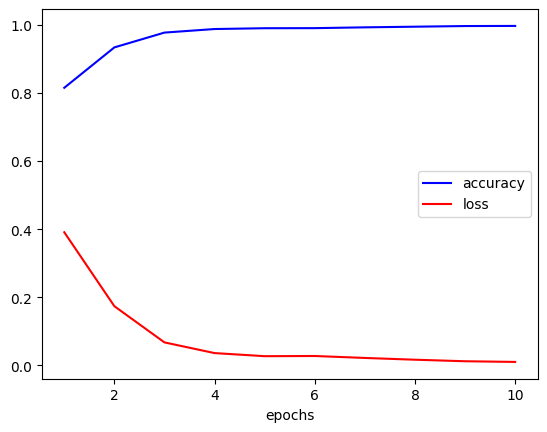

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 256, 500)          5000000   
                                                                 
 conv1d_27 (Conv1D)          (None, 256, 64)           96064     
                                                                 
 conv1d_28 (Conv1D)          (None, 256, 32)           6176      
                                                                 
 conv1d_29 (Conv1D)          (None, 256, 16)           1552      
                                                                 
 flatten_9 (Flatten)         (None, 4096)              0         
                                                                 
 dropout_18 (Dropout)        (None, 4096)              0         
                                                                 
 dense_18 (Dense)            (None, 180)              

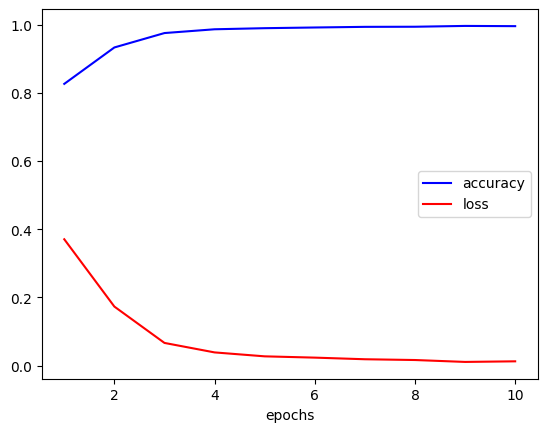

In [ ]:
#cnn with callback
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution1D, Flatten, Dropout
from keras.layers import Embedding
from keras.utils import pad_sequences
import matplotlib.pyplot as plt

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

for i in range(1000,10001,1000):
# Using keras to load the dataset with the top_words
  top_words = i
  (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Pad the sequences to the same length
  max_review_length = 256
  X_train = pad_sequences(X_train, maxlen=max_review_length)
  X_test = pad_sequences(X_test, maxlen=max_review_length)

# Using embedding from Keras

  embedding_vecor_length = 500
  model = Sequential()
  model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

  # Convolutional model (3x conv, flatten, 2x dense)
  model.add(Convolution1D(64, 3, padding='same'))
  model.add(Convolution1D(32, 3, padding='same'))
  model.add(Convolution1D(16, 3, padding='same'))
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add(Dense(180,activation='sigmoid'))
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  print(model.summary())

  history2=model.fit(X_train, y_train, epochs=10, batch_size=64,callbacks=[callback])

  # Evaluation on the test set
  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Accuracy: %.2f%%" % (scores[1]*100))
  history2_dict = history2.history
  history2_dict.keys()
  acc = history2_dict['accuracy']
  loss = history2_dict['loss']
  epoch=range(1,11,1)

  plt.plot(epoch,acc,'-b',label='accuracy')
  plt.plot(epoch,loss,'-r',label='loss')
  plt.xlabel("epochs")
  plt.legend()
  plt.show()

Loading data...
Pad sequences (samples x time)
Training entries: 25000, labels: 25000
[1, 6, 964, 437, 7, 58, 43, 1402, 11, 6, 171, 3978, 701, 570, 997, 4179, 1880, 6, 5211, 5288, 550, 1270, 1222, 4891, 519, 6141, 5, 236, 21, 24, 222, 6, 3934, 2, 40, 109, 19, 1513, 8, 1513, 893, 8016, 5, 1493, 11, 6, 2, 5, 25, 80, 28, 14, 806, 1338, 18, 6, 20, 13, 66, 188, 6, 462, 46, 7, 4, 884, 445, 40, 2699, 2, 9671, 4, 114, 16, 1198, 200, 5400, 5, 701, 2975, 89, 111, 2, 26, 1688, 8, 97, 6, 2476, 1431, 2863, 2134, 23, 6, 519, 1522, 1527, 470, 21, 161, 36, 413, 2, 143, 2, 4756, 14, 16, 398, 18, 2, 6286, 12, 299, 40, 6, 374, 500, 13, 122, 358, 4, 2, 1530, 5128, 11, 4, 2092, 151]
Label =  0
129
1641221/1641221 [==============================] - 0s 0us/step
<START> a total waste of time just throw in a few explosions non stop fighting exotic cars a deranged millionaire slow motion computer generated car crashes and last but not least a hugh <UNK> like character with wall to wall hot babes and mix in a <U

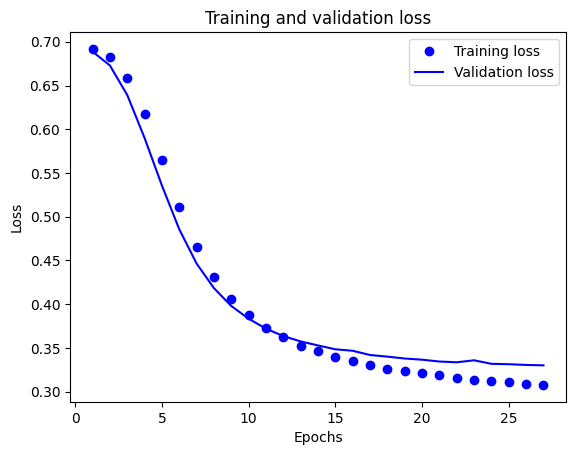

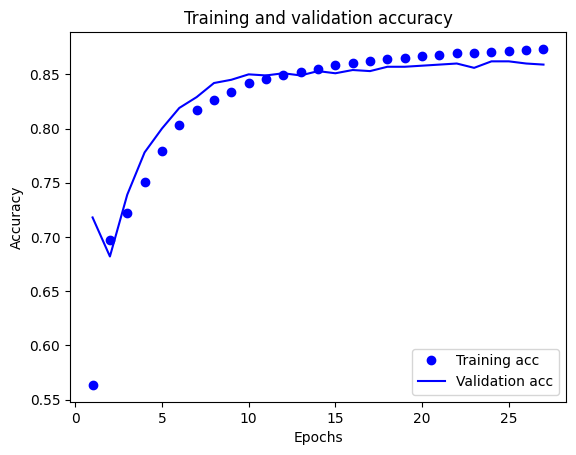

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 16)          32000     
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 32,289
Trainable params: 32,289
Non-trainable params: 0
_________________________________________________________________
Build model...
Epoch 1/40
47/47 [==============================] - 10s 188ms/step - loss: 0.6914 - acc: 0.5544 - va

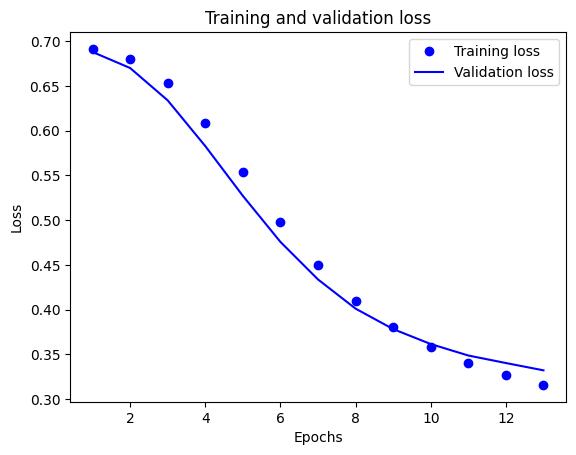

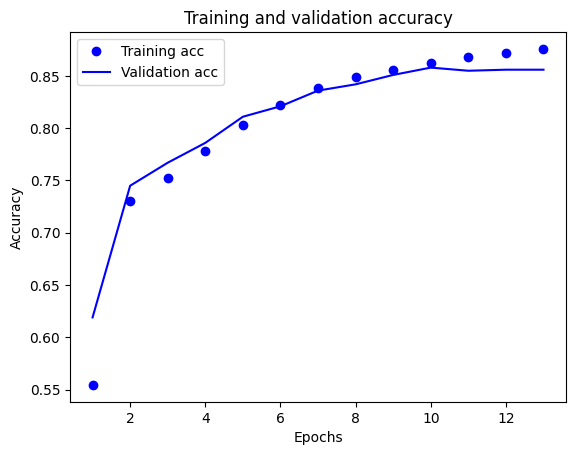

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 16)          48000     
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_24 (Dense)            (None, 16)                272       
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________
Build model...
Epoch 1/40
47/47 [==============================] - 11s 218ms/step - loss: 0.6911 - acc: 0.6028 - va

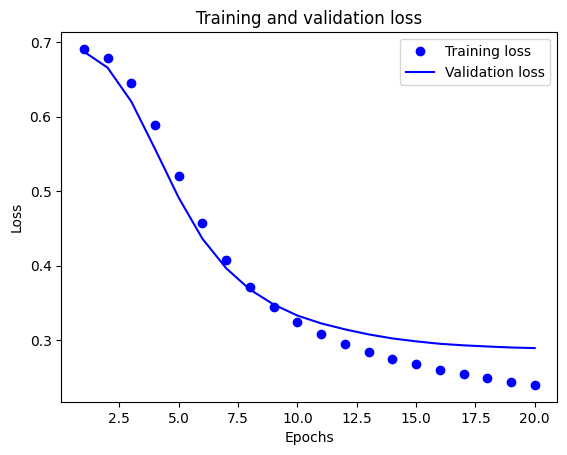

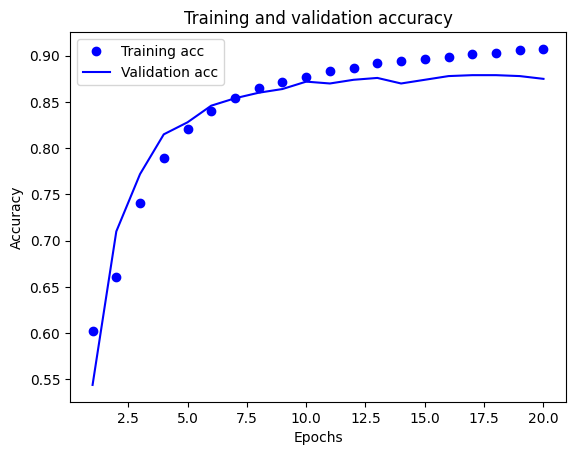

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 16)          64000     
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_26 (Dense)            (None, 16)                272       
                                                                 
 dense_27 (Dense)            (None, 1)                 17        
                                                                 
Total params: 64,289
Trainable params: 64,289
Non-trainable params: 0
_________________________________________________________________
Build model...
Epoch 1/40
47/47 [==============================] - 11s 210ms/step - loss: 0.6897 - acc: 0.6199 - va

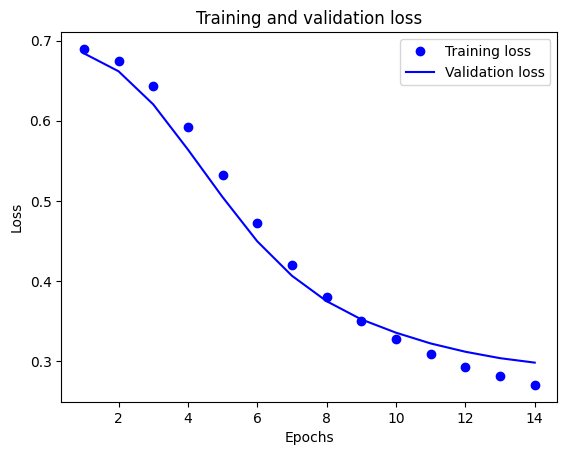

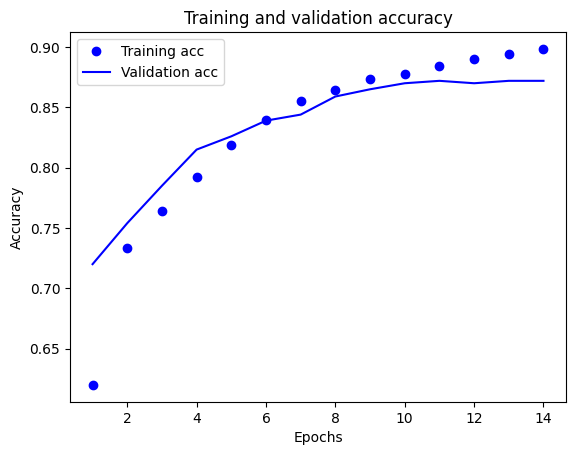

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, None, 16)          80000     
                                                                 
 global_average_pooling1d_4   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 80,289
Trainable params: 80,289
Non-trainable params: 0
_________________________________________________________________
Build model...
Epoch 1/40
47/47 [==============================] - 11s 215ms/step - loss: 0.6911 - acc: 0.5805 - va

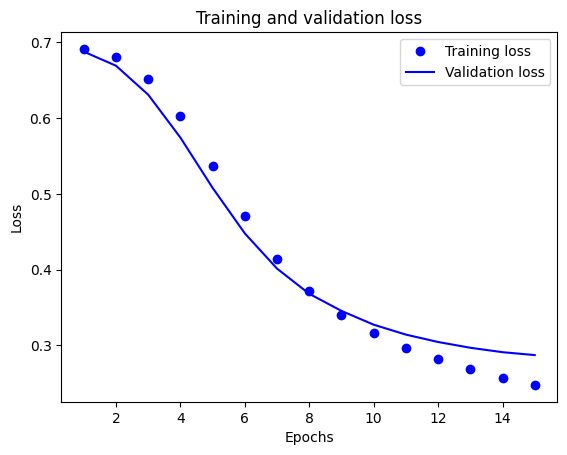

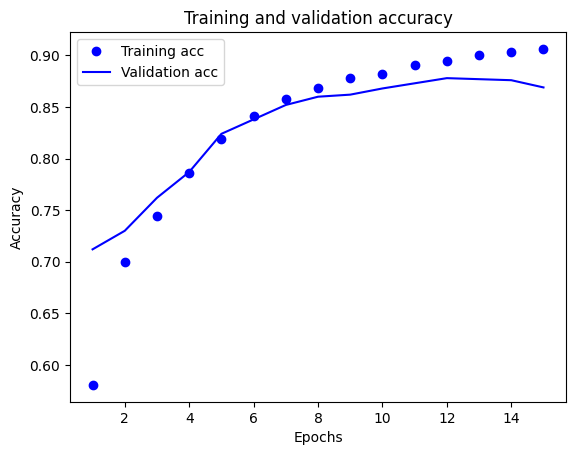

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 16)          96000     
                                                                 
 global_average_pooling1d_5   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_30 (Dense)            (None, 16)                272       
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                                 
Total params: 96,289
Trainable params: 96,289
Non-trainable params: 0
_________________________________________________________________
Build model...
Epoch 1/40
47/47 [==============================] - 10s 191ms/step - loss: 0.6900 - acc: 0.5792 - va

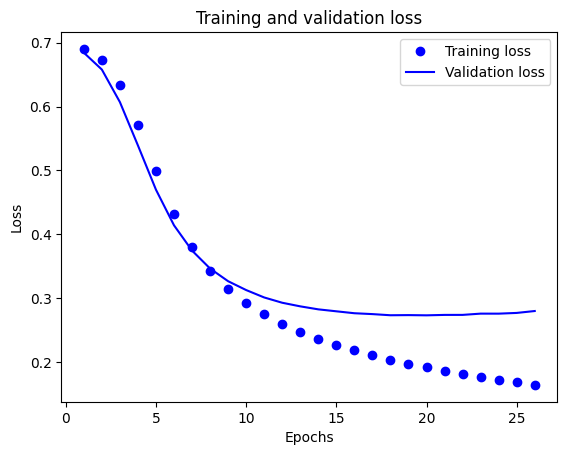

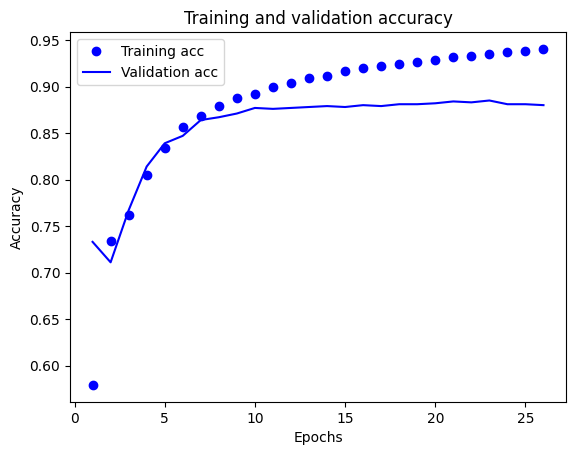

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, None, 16)          112000    
                                                                 
 global_average_pooling1d_6   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_32 (Dense)            (None, 16)                272       
                                                                 
 dense_33 (Dense)            (None, 1)                 17        
                                                                 
Total params: 112,289
Trainable params: 112,289
Non-trainable params: 0
_________________________________________________________________
Build model...
Epoch 1/40
47/47 [==============================] - 12s 219ms/step - loss: 0.6906 - acc: 0.5396 - 

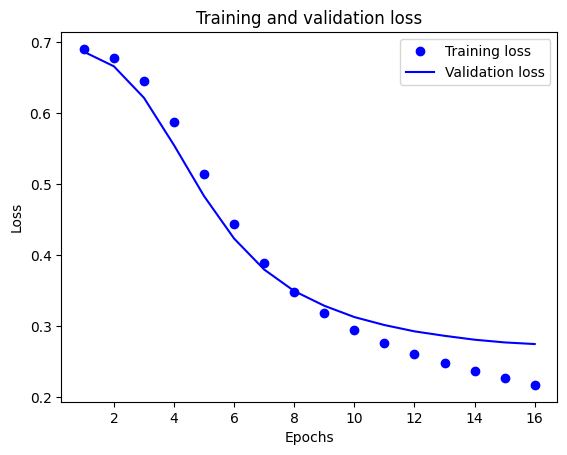

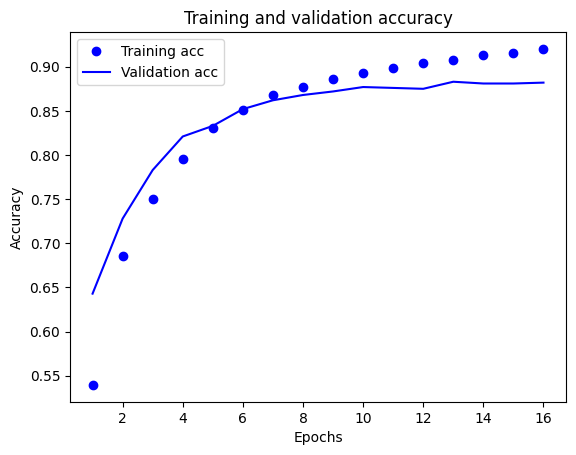

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, None, 16)          128000    
                                                                 
 global_average_pooling1d_7   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_34 (Dense)            (None, 16)                272       
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 128,289
Trainable params: 128,289
Non-trainable params: 0
_________________________________________________________________
Build model...
Epoch 1/40
47/47 [==============================] - 11s 222ms/step - loss: 0.6902 - acc: 0.6240 - 

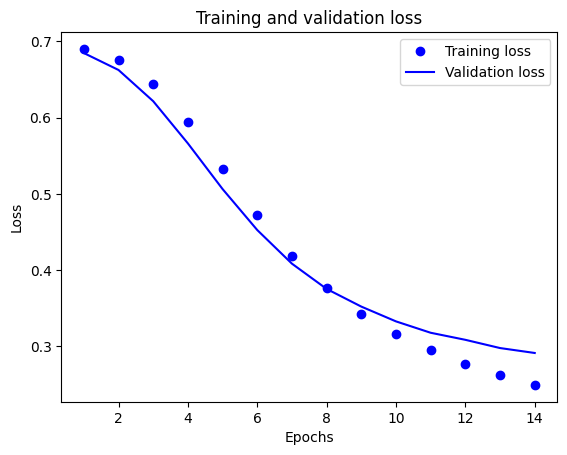

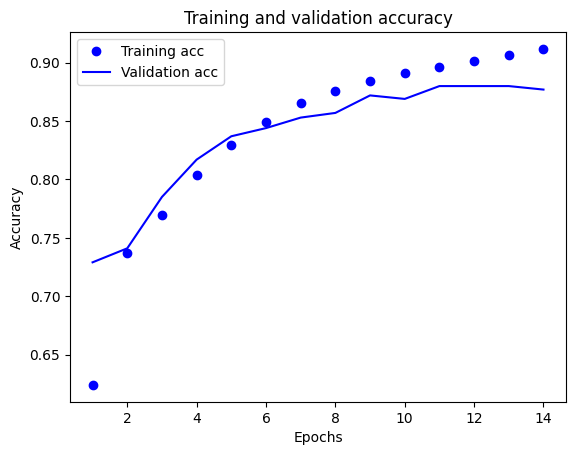

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, None, 16)          144000    
                                                                 
 global_average_pooling1d_8   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_36 (Dense)            (None, 16)                272       
                                                                 
 dense_37 (Dense)            (None, 1)                 17        
                                                                 
Total params: 144,289
Trainable params: 144,289
Non-trainable params: 0
_________________________________________________________________
Build model...
Epoch 1/40
47/47 [==============================] - 11s 213ms/step - loss: 0.6895 - acc: 0.6003 - 

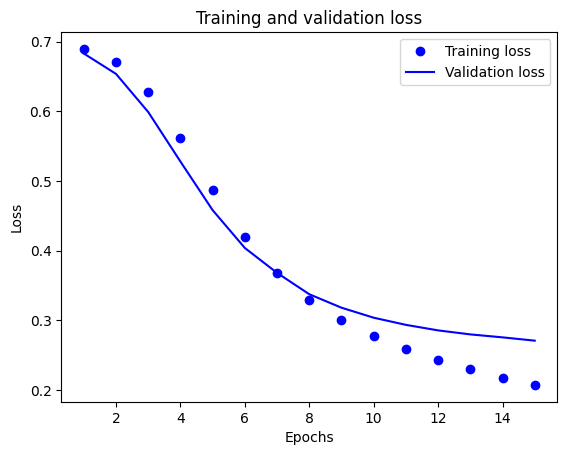

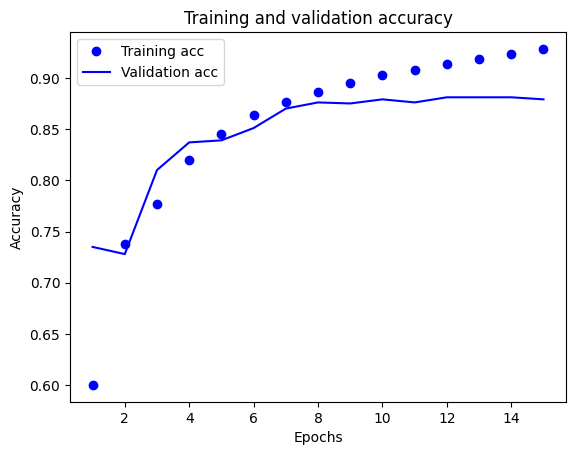

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, None, 16)          160000    
                                                                 
 global_average_pooling1d_9   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_38 (Dense)            (None, 16)                272       
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________
Build model...
Epoch 1/40
47/47 [==============================] - 11s 215ms/step - loss: 0.6917 - acc: 0.6028 - 

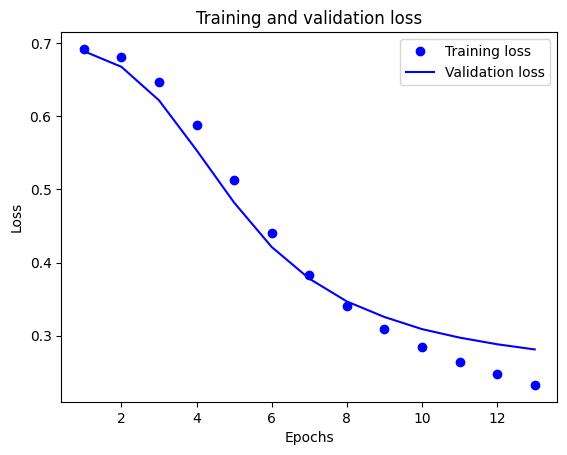

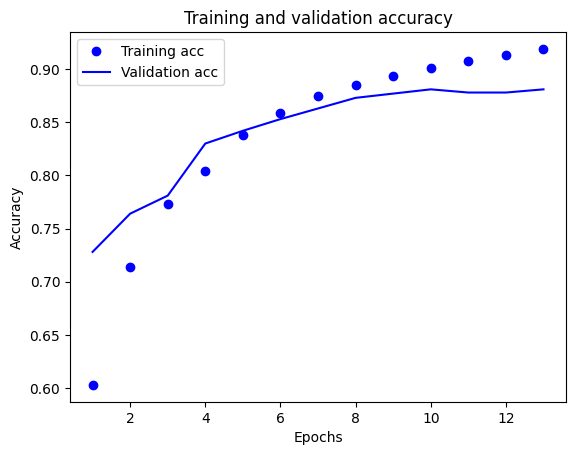

In [ ]:
#mlp 2 with callback
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import GRU
from keras.datasets import imdb
import matplotlib.pyplot as plt


import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
max_features = 10000
batch_size = 32

print('Loading data...')
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)


print('Pad sequences (samples x time)')
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

example_idx=15
print(train_data[example_idx])
print('Label = ',train_labels[example_idx])

print(len(train_data[example_idx]))
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(train_data[example_idx]))

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

print(train_data[example_idx])

for i in range(1000,10001,1000):
  vocab_size = i

  model = keras.Sequential()
  model.add(keras.layers.Embedding(vocab_size, 16))
  model.add(keras.layers.GlobalAveragePooling1D())
  model.add(keras.layers.Dense(16, activation=tf.nn.relu))
  model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

  model.summary()

  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

  x_val = train_data[:1000]
  partial_x_train = train_data[1000:]

  y_val = train_labels[:1000]
  partial_y_train = train_labels[1000:]
  print('Build model...')

  history = model.fit(partial_x_train,
                    partial_y_train,
                    callbacks=[callback],
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

  results = model.evaluate(test_data, test_labels)

  print(results)
  history_dict = history.history
  history_dict.keys()
  acc = history_dict['acc']
  val_acc = history_dict['val_acc']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.clf()   # clear figure
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 256, 300)          3000000   
                                                                 
 conv1d_30 (Conv1D)          (None, 256, 32)           28832     
                                                                 
 conv1d_31 (Conv1D)          (None, 256, 16)           1552      
                                                                 
 flatten_10 (Flatten)        (None, 4096)              0         
                                                                 
 dropout_20 (Dropout)        (None, 4096)              0         
                                                                 
 dense_40 (Dense)            (None, 180)               737460    
                                                                 
 dropout_21 (Dropout)        (None, 180)             

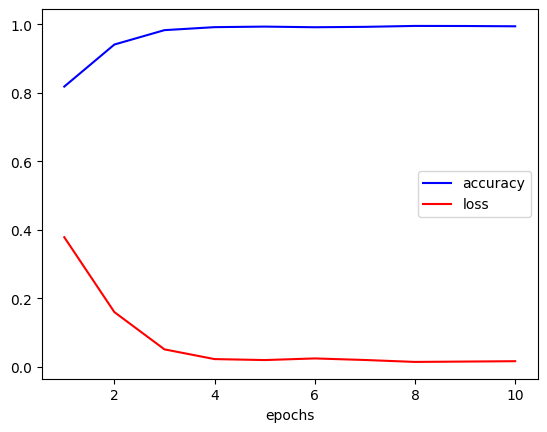

In [ ]:
#cnn with callback
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution1D, Flatten, Dropout
from keras.layers import Embedding
from keras.utils import pad_sequences
import matplotlib.pyplot as plt

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

# Using keras to load the dataset with the top_words
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Pad the sequences to the same length
max_review_length = 256
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

# Using embedding from Keras
embedding_vecor_length = 300
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

# Convolutional model (3x conv, flatten, 2x dense)
model.add(Convolution1D(32, 3, padding='same'))
model.add(Convolution1D(16, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(180,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

history2=model.fit(X_train, y_train, epochs=10, batch_size=64,callbacks=[callback])

# Evaluation on the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

history2_dict = history2.history
history2_dict.keys()
acc = history2_dict['accuracy']
loss = history2_dict['loss']
epoch=range(1,11,1)

plt.plot(epoch,acc,'-b',label='accuracy')
plt.plot(epoch,loss,'-r',label='loss')
plt.xlabel("epochs")
plt.legend()
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 300)          3000000   
                                                                 
 conv1d (Conv1D)             (None, 256, 16)           14416     
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 180)               737460    
                                                                 
 dropout_1 (Dropout)         (None, 180)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

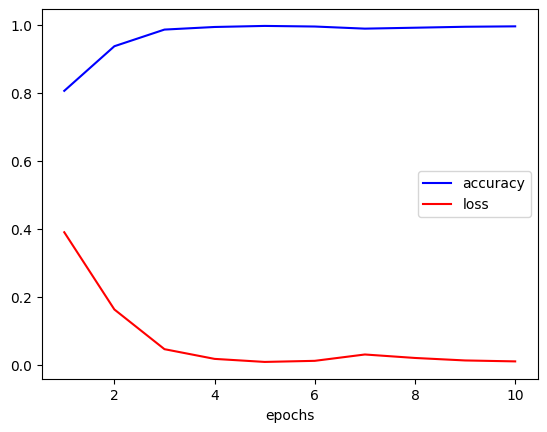

In [ ]:
#cnn with callback
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution1D, Flatten, Dropout
from keras.layers import Embedding
from keras.utils import pad_sequences
import matplotlib.pyplot as plt


# Using keras to load the dataset with the top_words
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Pad the sequences to the same length
max_review_length = 256
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

# Using embedding from Keras
embedding_vecor_length = 300
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

# Convolutional model (3x conv, flatten, 2x dense)
model.add(Convolution1D(16, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(180,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

history2=model.fit(X_train, y_train, epochs=10, batch_size=64)

# Evaluation on the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

history2_dict = history2.history
history2_dict.keys()
acc = history2_dict['accuracy']
loss = history2_dict['loss']
epoch=range(1,11,1)

plt.plot(epoch,acc,'-b',label='accuracy')
plt.plot(epoch,loss,'-r',label='loss')
plt.xlabel("epochs")
plt.legend()
plt.show()

Loading data...
Pad sequences (samples x time)
Training entries: 25000, labels: 25000
[1, 6, 964, 437, 7, 58, 43, 1402, 11, 6, 171, 3978, 701, 570, 997, 4179, 1880, 6, 5211, 5288, 550, 1270, 1222, 4891, 519, 6141, 5, 236, 21, 24, 222, 6, 3934, 2, 40, 109, 19, 1513, 8, 1513, 893, 8016, 5, 1493, 11, 6, 2, 5, 25, 80, 28, 14, 806, 1338, 18, 6, 20, 13, 66, 188, 6, 462, 46, 7, 4, 884, 445, 40, 2699, 2, 9671, 4, 114, 16, 1198, 200, 5400, 5, 701, 2975, 89, 111, 2, 26, 1688, 8, 97, 6, 2476, 1431, 2863, 2134, 23, 6, 519, 1522, 1527, 470, 21, 161, 36, 413, 2, 143, 2, 4756, 14, 16, 398, 18, 2, 6286, 12, 299, 40, 6, 374, 500, 13, 122, 358, 4, 2, 1530, 5128, 11, 4, 2092, 151]
Label =  0
129
<START> a total waste of time just throw in a few explosions non stop fighting exotic cars a deranged millionaire slow motion computer generated car crashes and last but not least a hugh <UNK> like character with wall to wall hot babes and mix in a <UNK> and you will have this sorry excuse for a movie i really go

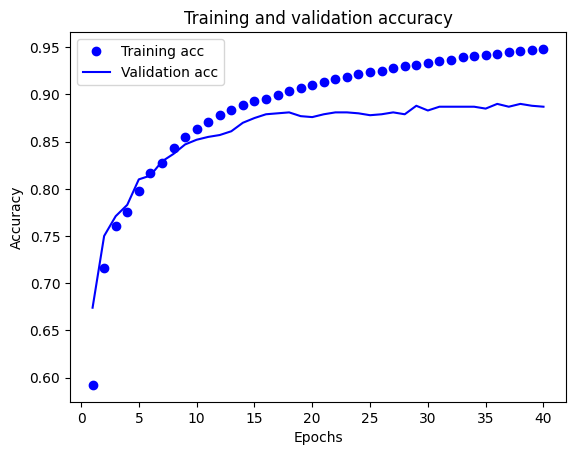

[   1    6  964  437    7   58   43 1402   11    6  171 3978  701  570
  997 4179 1880    6 5211 5288  550 1270 1222 4891  519 6141    5  236
   21   24  222    6 3934    2   40  109   19 1513    8 1513  893 8016
    5 1493   11    6    2    5   25   80   28   14  806 1338   18    6
   20   13   66  188    6  462   46    7    4  884  445   40 2699    2
 9671    4  114   16 1198  200 5400    5  701 2975   89  111    2   26
 1688    8   97    6 2476 1431 2863 2134   23    6  519 1522 1527  470
   21  161   36  413    2  143    2 4756   14   16  398   18    2 6286
   12  299   40    6  374  500   13  122  358    4    2 1530 5128   11
    4 2092  151    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

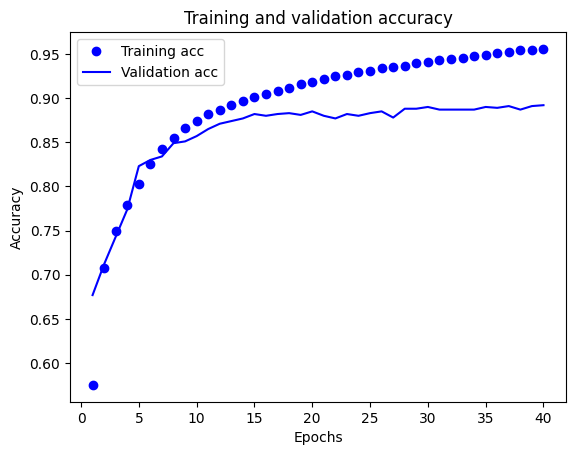

[   1    6  964  437    7   58   43 1402   11    6  171 3978  701  570
  997 4179 1880    6 5211 5288  550 1270 1222 4891  519 6141    5  236
   21   24  222    6 3934    2   40  109   19 1513    8 1513  893 8016
    5 1493   11    6    2    5   25   80   28   14  806 1338   18    6
   20   13   66  188    6  462   46    7    4  884  445   40 2699    2
 9671    4  114   16 1198  200 5400    5  701 2975   89  111    2   26
 1688    8   97    6 2476 1431 2863 2134   23    6  519 1522 1527  470
   21  161   36  413    2  143    2 4756   14   16  398   18    2 6286
   12  299   40    6  374  500   13  122  358    4    2 1530 5128   11
    4 2092  151    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

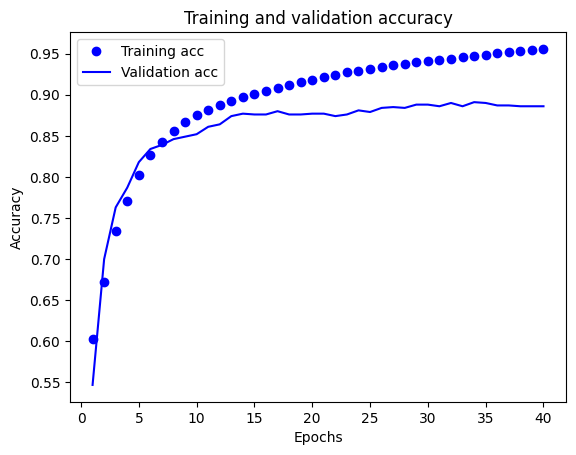

[   1    6  964  437    7   58   43 1402   11    6  171 3978  701  570
  997 4179 1880    6 5211 5288  550 1270 1222 4891  519 6141    5  236
   21   24  222    6 3934    2   40  109   19 1513    8 1513  893 8016
    5 1493   11    6    2    5   25   80   28   14  806 1338   18    6
   20   13   66  188    6  462   46    7    4  884  445   40 2699    2
 9671    4  114   16 1198  200 5400    5  701 2975   89  111    2   26
 1688    8   97    6 2476 1431 2863 2134   23    6  519 1522 1527  470
   21  161   36  413    2  143    2 4756   14   16  398   18    2 6286
   12  299   40    6  374  500   13  122  358    4    2 1530 5128   11
    4 2092  151    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

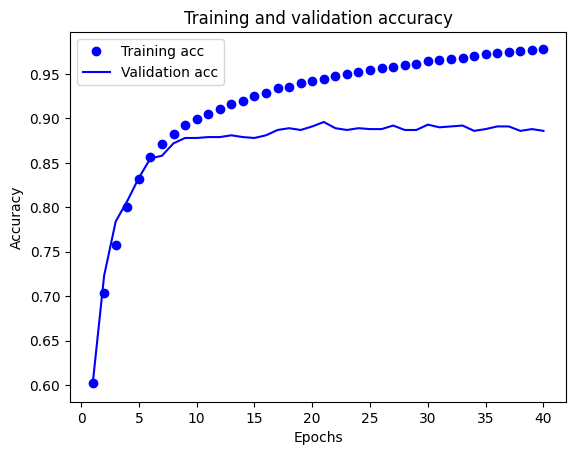

[   1    6  964  437    7   58   43 1402   11    6  171 3978  701  570
  997 4179 1880    6 5211 5288  550 1270 1222 4891  519 6141    5  236
   21   24  222    6 3934    2   40  109   19 1513    8 1513  893 8016
    5 1493   11    6    2    5   25   80   28   14  806 1338   18    6
   20   13   66  188    6  462   46    7    4  884  445   40 2699    2
 9671    4  114   16 1198  200 5400    5  701 2975   89  111    2   26
 1688    8   97    6 2476 1431 2863 2134   23    6  519 1522 1527  470
   21  161   36  413    2  143    2 4756   14   16  398   18    2 6286
   12  299   40    6  374  500   13  122  358    4    2 1530 5128   11
    4 2092  151    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

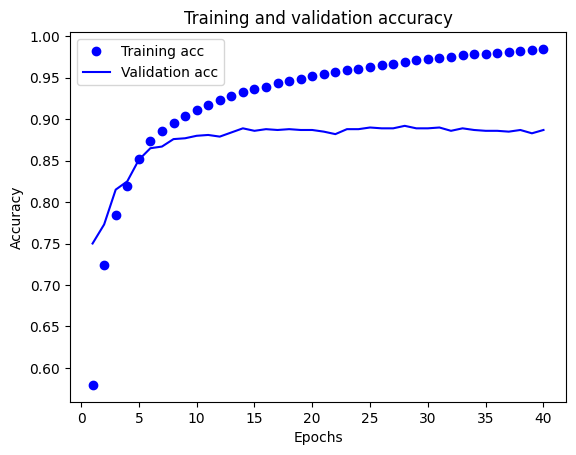

[   1    6  964  437    7   58   43 1402   11    6  171 3978  701  570
  997 4179 1880    6 5211 5288  550 1270 1222 4891  519 6141    5  236
   21   24  222    6 3934    2   40  109   19 1513    8 1513  893 8016
    5 1493   11    6    2    5   25   80   28   14  806 1338   18    6
   20   13   66  188    6  462   46    7    4  884  445   40 2699    2
 9671    4  114   16 1198  200 5400    5  701 2975   89  111    2   26
 1688    8   97    6 2476 1431 2863 2134   23    6  519 1522 1527  470
   21  161   36  413    2  143    2 4756   14   16  398   18    2 6286
   12  299   40    6  374  500   13  122  358    4    2 1530 5128   11
    4 2092  151    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

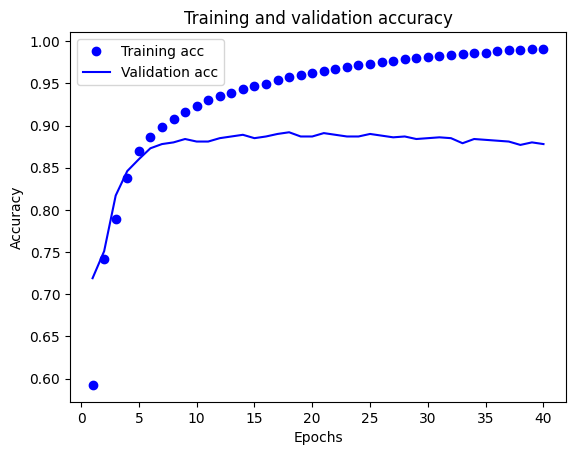

In [ ]:
#mlp 2 with callback
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import GRU
from keras.datasets import imdb
import matplotlib.pyplot as plt


import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

max_features = 10000
batch_size = 32

print('Loading data...')
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)


print('Pad sequences (samples x time)')
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

example_idx=15
print(train_data[example_idx])
print('Label = ',train_labels[example_idx])

print(len(train_data[example_idx]))
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(train_data[example_idx]))

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

for n in (2,4,8,16,32,64):
  print(train_data[example_idx])

  vocab_size = 10000

  model = keras.Sequential()
  model.add(keras.layers.Embedding(vocab_size, 16))
  model.add(keras.layers.GlobalAveragePooling1D())
  model.add(keras.layers.Dense(n, activation=tf.nn.relu))
  model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

  model.summary()

  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

  x_val = train_data[:1000]
  partial_x_train = train_data[1000:]

  y_val = train_labels[:1000]
  partial_y_train = train_labels[1000:]
  print('Build model...')

  history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

  results = model.evaluate(test_data, test_labels)

  print(results)
  history_dict = history.history
  history_dict.keys()
  acc = history_dict['acc']
  val_acc = history_dict['val_acc']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()